In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns

In [2]:
dataset_path = r"https://drive.google.com/uc?export=download&id=15WLXT1EJMoosSUNfUnXplKYyd3gT0wU7"
df = pd.read_csv(dataset_path)

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
cat_vars = df.select_dtypes(include='object')
cat_vars.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RH   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         HLS    AllPub    Inside       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0        NAmes      Feedr       Norm     1Fam     1Story     Gable  CompShg   
1        NAmes       Norm       Norm     1Fam     1Story       Hip  CompShg   
2      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      StoneBr       Norm       Norm   TwnhsE     1Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd       None        TA        TA     CBlock       TA   
1     Wd Sdng     Wd Sdng    BrkFace        TA        TA     CBlock       TA   
2     VinylSd     VinylSd       None        TA        TA      PConc       Gd   
3     VinylSd     VinylSd    BrkFace        TA        TA      PConc       TA   
4     HdBoard     HdBoard       None        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          Rec          LwQ    GasA        TA   
1       TA           No          ALQ          Unf    GasA        TA   
2       TA           No          GLQ          Unf    GasA        Gd   
3       TA           No          GLQ          Unf    GasA        Ex   
4       TA           No          ALQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          TA        Typ         NaN     Attchd   
1          Y      SBrkr          Gd        Typ         NaN     Attchd   
2          Y      SBrkr          TA        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Attchd   
4          Y      SBrkr          Gd        Typ         NaN     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature  \
0          Unf         TA         TA          Y    NaN  MnPrv         NaN   
1          Unf         TA         TA          Y    NaN    NaN        Gar2   
2          Fin         TA         TA          Y    NaN  MnPrv         NaN   
3          Fin         TA         TA          Y    NaN    NaN         NaN   
4          RFn         TA         TA          Y    NaN    NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD        Normal  
4       WD        Normal

In [7]:
miss_val_per = cat_vars.isnull().mean()*100
miss_val_per

MSZoning          0.274160
Street            0.000000
Alley            92.666210
LotShape          0.000000
LandContour       0.000000
Utilities         0.137080
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType        1.096642
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.015764
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinType2      2.878684
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.000000
KitchenQual       0.068540
Functional        0.137080
FireplaceQu      50.034270
GarageType        5.209047
GarageFinish      5.346127
GarageQual        5.346127
GarageCond        5.346127
P

<AxesSubplot:>

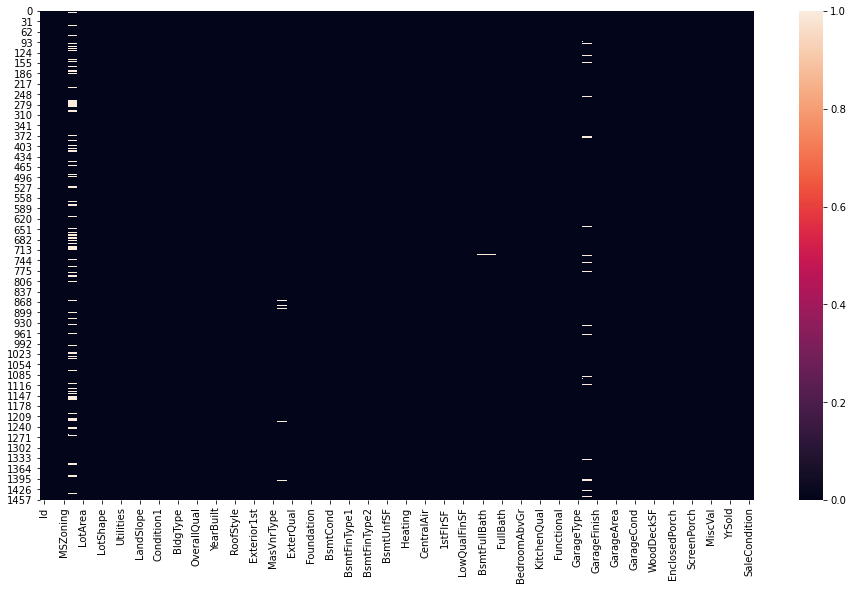

In [48]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [8]:
drop_vars=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
cat_vars.drop(columns=drop_vars,axis=1,inplace=True)
cat_vars.shape

C:\Users\fahim\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1459, 38)

In [15]:
isnull_per_var = cat_vars.isnull().mean()*100
miss_vars = isnull_per_var[isnull_per_var>0].keys()

In [16]:
miss_vars

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'SaleType'],
      dtype='object')

In [18]:
cat_vars['MasVnrType'].mode()

0    None
dtype: object

In [19]:
cat_vars['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

<AxesSubplot:>

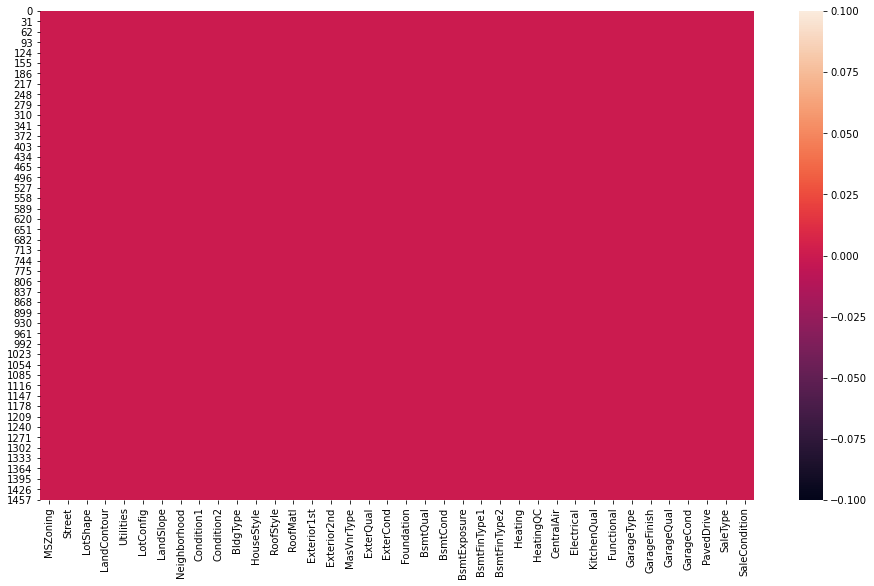

In [44]:
plt.figure(figsize=(16,9))
sns.heatmap(cat_vars.isnull())

In [20]:
cat_vars['MasVnrType'].fillna(cat_vars['MasVnrType'].mode()[0])

0          None
1       BrkFace
2          None
3       BrkFace
4          None
5          None
6          None
7          None
8          None
9          None
10         None
11      BrkFace
12      BrkFace
13         None
14         None
15        Stone
16        Stone
17      BrkFace
18      BrkFace
19      BrkFace
20      BrkFace
21        Stone
22         None
23      BrkFace
24         None
25         None
26      BrkFace
27      BrkFace
28         None
29         None
30      BrkFace
31         None
32       BrkCmn
33      BrkFace
34      BrkFace
35         None
36         None
37      BrkFace
38         None
39      BrkFace
40      BrkFace
41         None
42         None
43         None
44         None
45      BrkFace
46         None
47         None
48         None
49      BrkFace
50         None
51      BrkFace
52         None
53      BrkFace
54      BrkFace
55        Stone
56      BrkFace
57         None
58      BrkFace
59      BrkFace
60      BrkFace
61        Stone
62      

In [21]:
for var in miss_vars:
    cat_vars[var].fillna(cat_vars[var].mode()[0],inplace=True)
    print(var,"=",cat_vars[var].mode()[0])

MSZoning = RL
Utilities = AllPub
Exterior1st = VinylSd
Exterior2nd = VinylSd
MasVnrType = None
BsmtQual = TA
BsmtCond = TA
BsmtExposure = No
BsmtFinType1 = GLQ
BsmtFinType2 = Unf
KitchenQual = TA
Functional = Typ
GarageType = Attchd
GarageFinish = Unf
GarageQual = TA
GarageCond = TA
SaleType = WD


C:\Users\fahim\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [23]:
cat_vars.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

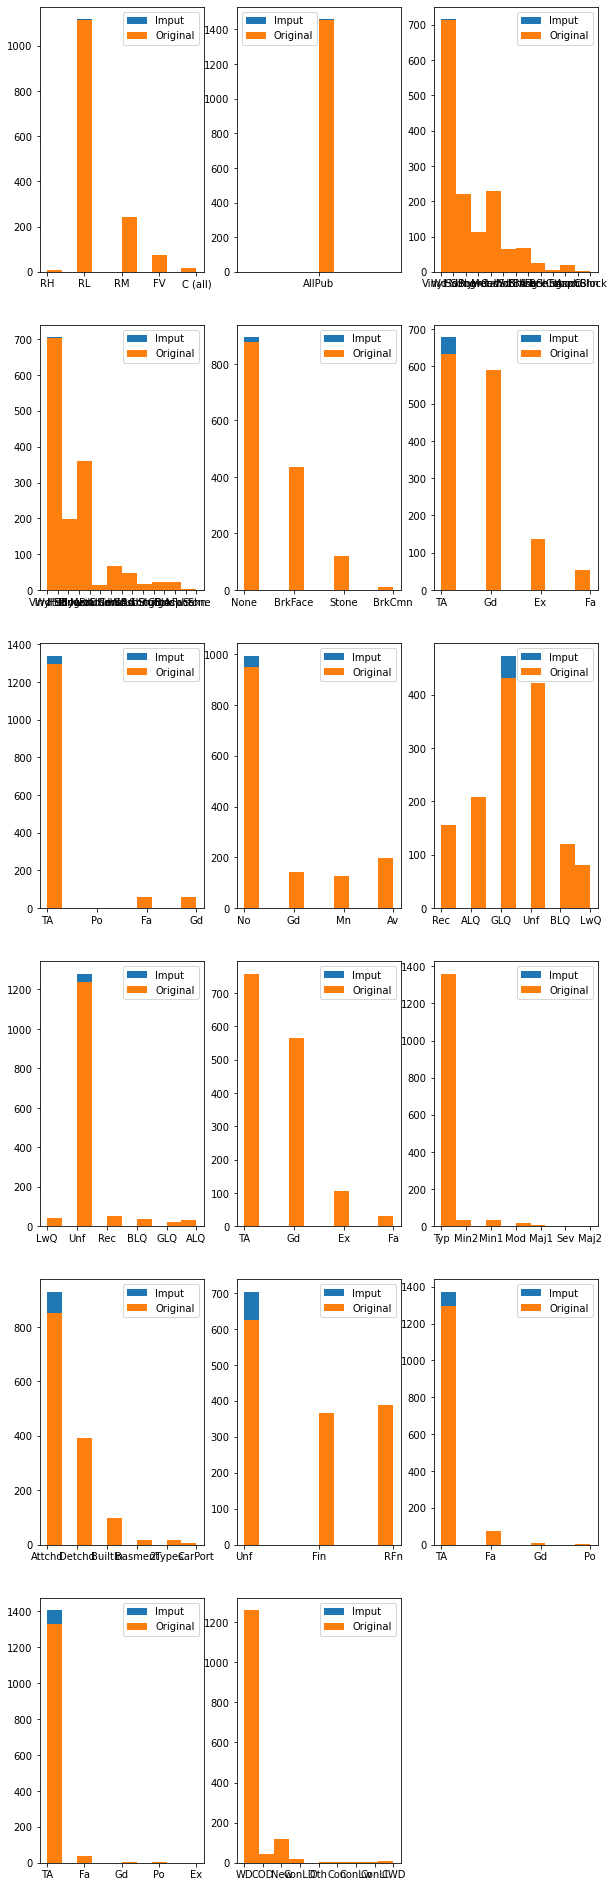

In [36]:
plt.figure(figsize=(10,40))
for i,var in enumerate(miss_vars):
    plt.subplot(7,3,i+1)
    plt.hist(cat_vars[var],label='Imput')
    plt.hist(df[var].dropna(),label='Original')
    plt.legend()

In [40]:
df.update(cat_vars)
df.drop(columns=drop_vars,inplace=True)
df


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     1461          20       RH         80.0    11622   Pave      Reg   
1     1462          20       RL         81.0    14267   Pave      IR1   
2     1463          60       RL         74.0    13830   Pave      IR1   
3     1464          60       RL         78.0     9978   Pave      IR1   
4     1465         120       RL         43.0     5005   Pave      IR1   
5     1466          60       RL         75.0    10000   Pave      IR1   
6     1467          20       RL          NaN     7980   Pave      IR1   
7     1468          60       RL         63.0     8402   Pave      IR1   
8     1469          20       RL         85.0    10176   Pave      Reg   
9     1470          20       RL         70.0     8400   Pave      Reg   
10    1471         120       RH         26.0     5858   Pave      IR1   
11    1472         160       RM         21.0     1680   Pave      Reg   
12    1473         160       RM         21.0     1680   Pave      Reg   
13    1474         160       RL         24.0     2280   Pave      Reg   
14    1475         120       RL         24.0     2280   Pave      Reg   
15    1476          60       RL        102.0    12858   Pave      IR1   
16    1477          20       RL         94.0    12883   Pave      IR1   
17    1478          20       RL         90.0    11520   Pave      Reg   
18    1479          20       RL         79.0    14122   Pave      IR1   
19    1480          20       RL        110.0    14300   Pave      Reg   
20    1481          60       RL        105.0    13650   Pave      Reg   
21    1482         120       RL         41.0     7132   Pave      IR1   
22    1483          20       RL        100.0    18494   Pave      IR1   
23    1484         120       RL         43.0     3203   Pave      Reg   
24    1485          80       RL         67.0    13300   Pave      IR1   
25    1486          60       RL         63.0     8577   Pave      IR1   
26    1487          60       RL         60.0    17433   Pave      IR2   
27    1488          20       RL         73.0     8987   Pave      Reg   
28    1489          20       FV         92.0     9215   Pave      Reg   
29    1490          20       FV         84.0    10440   Pave      Reg   
30    1491          60       RL         70.0    11920   Pave      Reg   
31    1492          30       RH         70.0     9800   Pave      Reg   
32    1493          20       RL         39.0    15410   Pave      IR1   
33    1494          60       RL         85.0    13143   Pave      IR1   
34    1495          60       RL         88.0    11134   Pave      Reg   
35    1496         120       FV         25.0     4835   Pave      IR1   
36    1497         160       FV         39.0     3515   Pave      Reg   
37    1498         160       FV         30.0     3215   Pave      Reg   
38    1499         160       FV         24.0     2544   Pave      Reg   
39    1500         160       FV         24.0     2544   Pave      Reg   
40    1501         160       FV          NaN     2980   Pave      Reg   
41    1502         160       FV          NaN     2403   Pave      IR1   
42    1503          20       FV         57.0    12853   Pave      IR1   
43    1504          60       FV         68.0     7379   Pave      IR1   
44    1505          20       FV         80.0     8000   Pave      Reg   
45    1506          20       RL          NaN    10456   Pave      IR1   
46    1507          60       RL         80.0    10791   Pave      Reg   
47    1508          50       RL          NaN    18837   Pave      IR1   
48    1509          60       RL         80.0     9600   Pave      Reg   
49    1510          20       RL         80.0     9600   Pave      Reg   
50    1511          20       RL         90.0     9900   Pave      Reg   
51    1512          20       RL         88.0     9680   Pave      Reg   
52    1513          80       RL          NaN    10600   Pave      IR1   
53    1514          90       RL         98.0    13260   Pave      

In [41]:
df.select_dtypes(include="object").isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [42]:
df.shape

(1459, 75)

<AxesSubplot:>

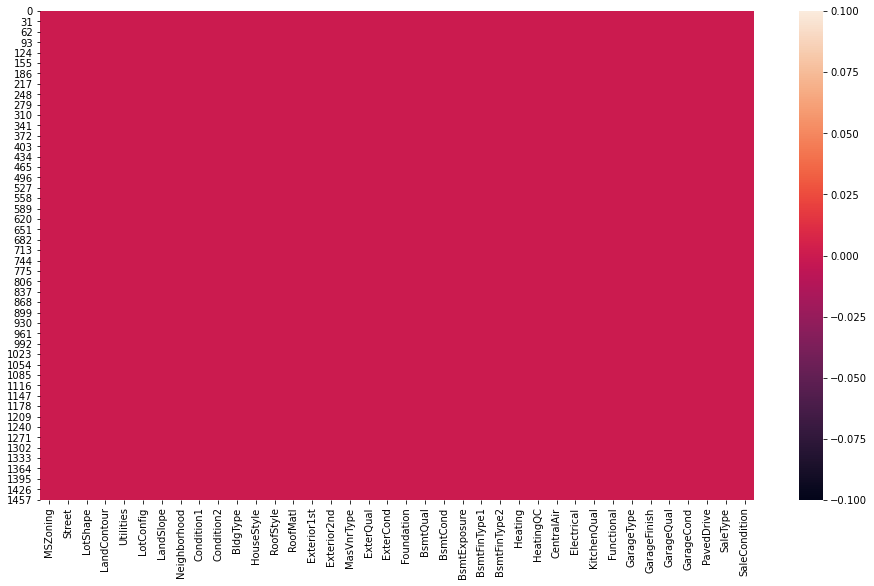

In [43]:
plt.figure(figsize=(16,9))
sns.heatmap(cat_vars.isnull())